In [2]:
# Data
# https://www.kaggle.com/siddarthareddyt/cats-and-dogs/data

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

/Users/administrator/anaconda3/envs/py37/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_path='/Users/administrator/Research/trainings/learnings/data/cats-and-dogs/train'
valid_path='/Users/administrator/Research/trainings/learnings/data/cats-and-dogs/valid'
test_path='/Users/administrator/Research/trainings/learnings/data/cats-and-dogs/test'

In [4]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['dogs','cats'],batch_size=100)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['dogs','cats'],batch_size=100)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:

def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=(100,100))
    cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=none if interp else 'none')

In [6]:
imgs,labels=next(train_batches)

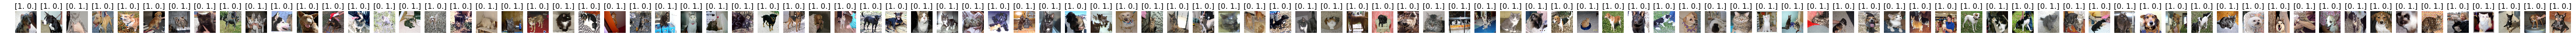

In [7]:
plots(imgs,titles=labels)
# Dogs: [1,0]
# Cats[0,1]

In [9]:
# Shape of the batch of images
#for img in imgs:
#    print(img.shape)

In [10]:
model = Sequential(
[
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(2,activation='softmax')
]
)

In [11]:
model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches,steps_per_epoch=200,validation_data=valid_batches,validation_steps=50,epochs=5,verbose=1)

Epoch 1/5
199/200 [============================>.] - ETA: 2s - loss: 8.0409 - acc: 0.5011